In [29]:
import pandas as pd

df = pd.read_pickle('movie_data.pkl')
df['Month'] = df['Released'].apply(lambda x: x.month)
df['Day'] = df['Released'].apply(lambda x: x.day)
df['Rated'] = df['Rated'].astype('category')
df['Rated'] = df['Rated'].cat.codes
df = df.drop(columns=[
    'Title', 'Released', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
    'Country', 'Awards', 'Language', 'tconst', 'BoxOffice'])
df = df[~df.isnull().any(axis=1)]
df['Runtime'] = df['Runtime'].astype(int)
df['Metascore'] = df['Metascore'].astype(int)
df['imdbRating'] = df['imdbRating'].apply(lambda x: x * 10).astype(int)
df['imdbVotes'] = df['imdbVotes'].astype(int)
df['RottenTomatoes'] = df['RottenTomatoes'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df

,Year,Rated,Runtime,Metascore,imdbRating,imdbVotes,RottenTomatoes,Production budget,profit,Month,Day
0,2015,5,138,80,78,983726,93,533200000,1.756681,12,18
1,2022,5,192,67,75,509749,76,460000000,1.487121,12,16
2,2023,5,154,58,65,207798,70,402300000,0.433707,6,30
3,2019,5,181,78,84,1297673,94,400000000,2.145932,4,26
4,2011,5,136,45,66,570796,33,379000000,0.636073,5,20
...,...,...,...,...,...,...,...,...,...,...,...
5870,2000,3,90,85,74,6762,94,10000,44.055400,9,9
5879,2004,5,77,68,67,115290,73,7000,60.680000,5,25
5880,2005,3,80,64,60,676,73,7000,10.010143,3,12
5881,1998,6,69,60,74,102938,82,6000,8.080333,11,5


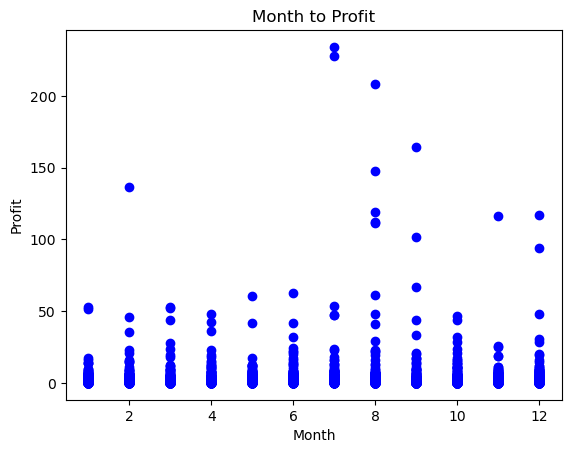

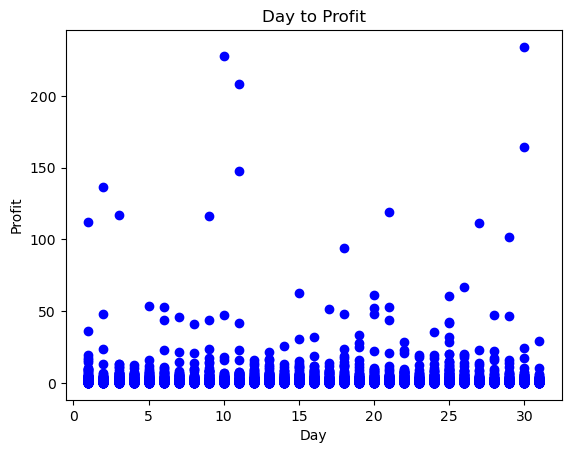

In [60]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

month = df['Month'].to_numpy().reshape(-1, 1)
day = df['Day'].to_numpy().reshape(-1, 1)
profit = df['profit'].to_numpy().reshape(-1, 1)
reg = LinearRegression()
reg.fit(month, profit)
y_pred = reg.predict(month)

plt.scatter(month, profit, color = 'blue')
plt.title('Month to Profit')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

reg.fit(day, profit)
y_pred = reg.predict(day)
plt.scatter(day, profit, color = 'blue')
plt.title('Day to Profit')
plt.xlabel('Day')
plt.ylabel('Profit')
plt.show()